# **Task_2**

Task2: Using Task1, we have to again create a NN model. The additional elements you have to put your NN is mentioned below.

❏ Apply kernel_regularizer, bias_regularizer and activity_regularizer in both Hidden layers and
set them to l2.

❏ Also report the results for l1.
kernel_regularizer

Note: You have to print the accuracy, f1 score, precision and recall

Dataset: use “Pima Indians Diabetes Dataset” for this task. The dataset can be downloaded from the kaggle website which can be found

(https://www.kaggle.com/uciml/pima-indians-diabetes-database)


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.metrics import recall_score,precision_score,accuracy_score,f1_score,confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from keras import regularizers

In [4]:

DF = pd.read_csv("/content/diabetes.csv")
DF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:

df_label = DF['Outcome']
df_features = DF.drop('Outcome', 1)
df_features.replace('?', -99999, inplace=True)
print(df_label.head())
df_features.head()


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


## **Heat Map Correlation** 

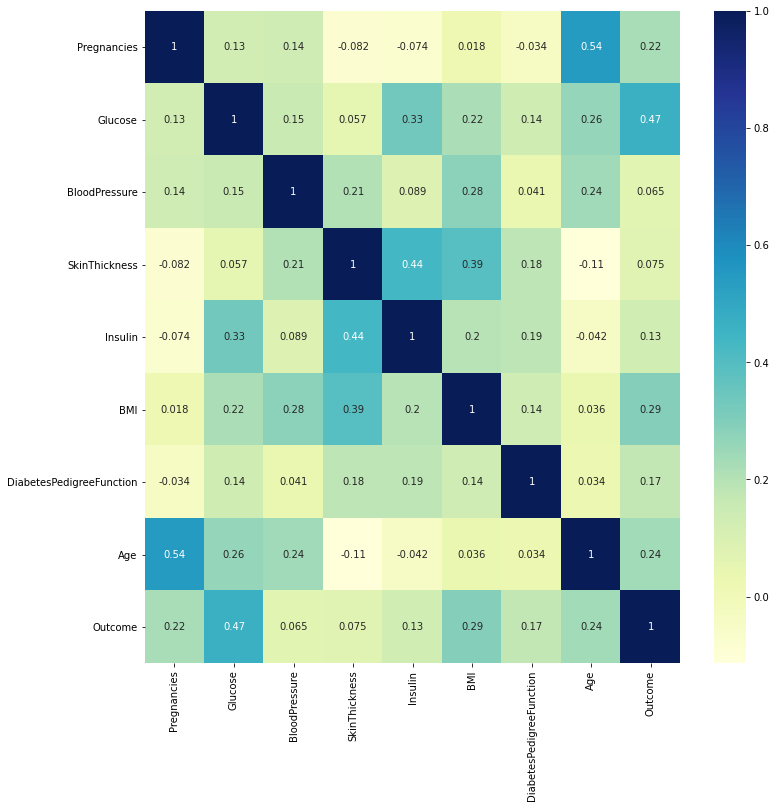

In [6]:
plt.figure(figsize=(12,12))
sns.heatmap(DF.corr(), cmap="YlGnBu", annot= True,)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


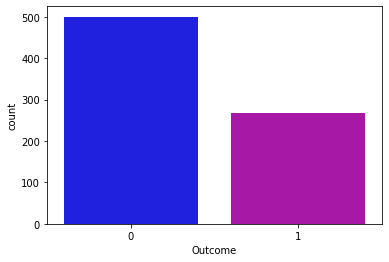

In [7]:
# Count plot for target veriable
sns.countplot(DF['Outcome'], palette=['b', 'm'])

**Pie Chart**

Text(0.5, 1.0, 'Percentage Breakdown of Non-Diabetic and Diabetic Individuals')

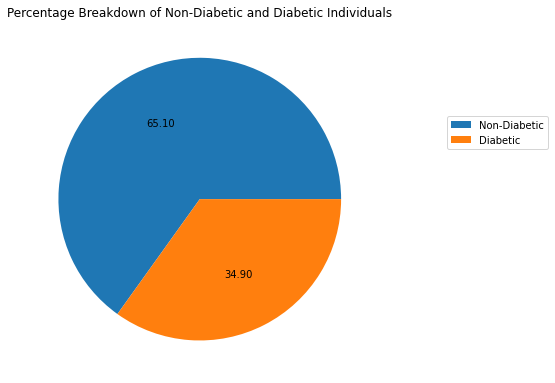

In [8]:

plt.figure(figsize=(6.5,6.5))
plt.pie(DF['Outcome'].value_counts(),autopct='%.2f')
plt.legend(['Non-Diabetic','Diabetic'],loc='best', bbox_to_anchor=(1, 0, .5, .75))
plt.title("Percentage Breakdown of Non-Diabetic and Diabetic Individuals")

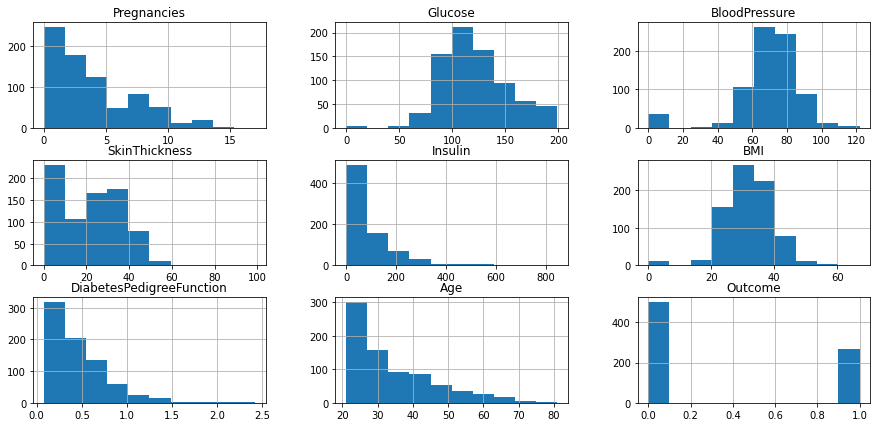

In [9]:
DF.hist(figsize = (15,7));

In [10]:

def plot(s):
    sns.kdeplot(DF.loc[ DF.Outcome == 0, s] )
    sns.kdeplot(DF.loc[ DF.Outcome == 1, s] )    
    plt.legend(['Healthy','Diabetic'])
    plt.ylabel('Number of Patients')
    plt.yticks([])
    plt.show() 

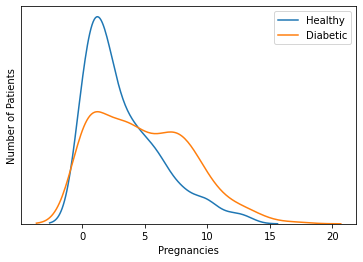

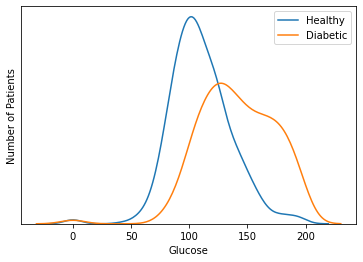

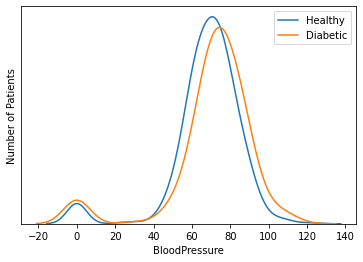

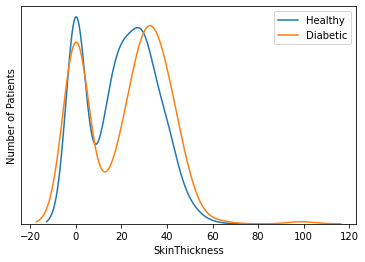

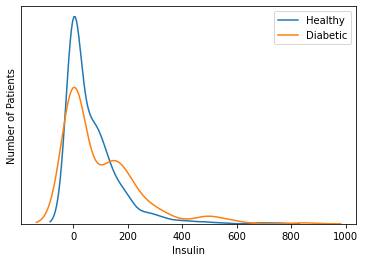

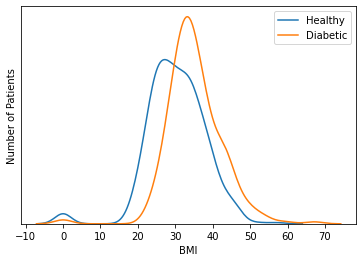

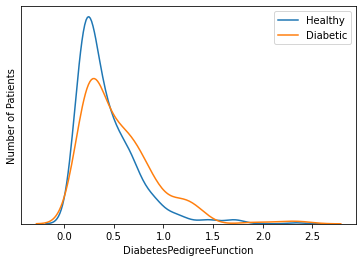

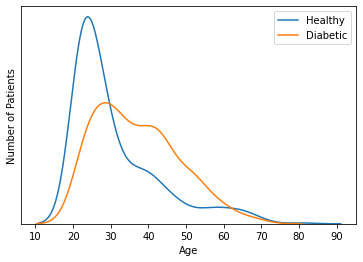

In [11]:

for i in DF.columns[:-1]:
    plot(i)

In [12]:
label = []
for lab in df_label:
    if lab == 1:
        label.append([1, 0])  # class 1
    elif lab == 0:
        label.append([0, 1])  # class 0

In [13]:
Data = np.array(df_features)
label = np.array(label)
print(Data.shape,label.shape)

(768, 8) (768, 2)


In [14]:
x_train, x_test, y_train, y_test = train_test_split(Data, label, test_size=0.2, random_state=60)
x_train.shape

(614, 8)

# **creating a NN model for l2**

In [15]:
model = Sequential()
#Hidden Layer 1
model.add(Dense(500,input_dim=8, activation='sigmoid', kernel_regularizer=regularizers.l2(1e-4), bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-4)))
#Hidden Layer 2 
model.add(Dense(100, activation='sigmoid',kernel_regularizer=regularizers.l2(1e-4),bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-4)))
#Output Layer
model.add(Dense(2, activation='softmax'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train, epochs=1000, batch_size=70, validation_data=(x_test, y_test))

Epoch 1/1000
9/9 [==============================] - 4s 32ms/step - loss: 0.2994 - accuracy: 0.5569 - val_loss: 0.2740 - val_accuracy: 0.6688
Epoch 2/1000
9/9 [==============================] - 0s 7ms/step - loss: 0.2816 - accuracy: 0.6317 - val_loss: 0.2457 - val_accuracy: 0.6753
Epoch 3/1000
9/9 [==============================] - 0s 7ms/step - loss: 0.2453 - accuracy: 0.6682 - val_loss: 0.2412 - val_accuracy: 0.6494
Epoch 4/1000
9/9 [==============================] - 0s 7ms/step - loss: 0.2394 - accuracy: 0.6912 - val_loss: 0.2362 - val_accuracy: 0.6948
Epoch 5/1000
9/9 [==============================] - 0s 7ms/step - loss: 0.2325 - accuracy: 0.7088 - val_loss: 0.2319 - val_accuracy: 0.6818
Epoch 6/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.2274 - accuracy: 0.7126 - val_loss: 0.2296 - val_accuracy: 0.7078
Epoch 7/1000
9/9 [==============================] - 0s 7ms/step - loss: 0.2290 - accuracy: 0.7188 - val_loss: 0.2240 - val_accuracy: 0.6883
Epoch 8/1000
9/9 [=

In [16]:
feature_try1 = np.array([x_train[0]])
feature_try2 = np.array([x_train[1]])



Result =model.predict_classes(feature_try2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [17]:
if Result==0:
    print("NO Diabetes")
else:
    print("Diabetes")

NO Diabetes


# **Accuracy**

In [18]:
# Testing accuracy
_, accuracy = model.evaluate(x_test, y_test)
print('Testing Accuracy: %.2f' % (accuracy*100))


#Training Accuracy
_, accuracy = model.evaluate(x_train, y_train)
print('Training Accuracy: %.2f' % (accuracy*100))



5/5 [==============================] - 0s 3ms/step - loss: 0.2672 - accuracy: 0.6948
Testing Accuracy: 69.48
20/20 [==============================] - 0s 2ms/step - loss: 0.0646 - accuracy: 0.9560
Training Accuracy: 95.60


In [19]:
# Make probability predictions with the model
y_pred = model.predict(x_test)

M=np.argmax(y_pred, axis=1)
NT=np.argmax(y_test, axis=1)

# **Accuracy, Precision,f1 score and recall: l2**

In [20]:
Accuracy = accuracy_score(NT,M)
print('accuracy: ',(Accuracy*100))

Precision = precision_score(NT, M)
print('Precision: ', Precision)

Score = f1_score(NT,M)
print('f1-score: ',Score)

recall = recall_score(NT, M)
print("recall: ", recall)

CM=confusion_matrix(NT,M)
print('confusion matrix: \n', CM)

accuracy:  69.48051948051948
Precision:  0.8181818181818182
f1-score:  0.7539267015706808
recall:  0.6990291262135923
confusion matrix: 
 [[35 16]
 [31 72]]


# **creating a NN model for l1**

In [21]:
model = Sequential()
#Hidden Layer 1
model.add(Dense(500,input_dim=8, activation='sigmoid', kernel_regularizer=regularizers.l1(1e-4), bias_regularizer=regularizers.l1(1e-4),activity_regularizer=regularizers.l1(1e-4)))
#Hidden Layer 2 
model.add(Dense(100, activation='sigmoid',kernel_regularizer=regularizers.l1(1e-4),bias_regularizer=regularizers.l1(1e-4),activity_regularizer=regularizers.l1(1e-4)))
#Output Layer
model.add(Dense(2, activation='softmax'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train, epochs=1000, batch_size=70, validation_data=(x_test, y_test))

Epoch 1/1000
9/9 [==============================] - 1s 48ms/step - loss: 0.5334 - accuracy: 0.6367 - val_loss: 0.4928 - val_accuracy: 0.6623
Epoch 2/1000
9/9 [==============================] - 0s 7ms/step - loss: 0.4924 - accuracy: 0.6640 - val_loss: 0.4732 - val_accuracy: 0.6883
Epoch 3/1000
9/9 [==============================] - 0s 7ms/step - loss: 0.4701 - accuracy: 0.6764 - val_loss: 0.4560 - val_accuracy: 0.6883
Epoch 4/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.4560 - accuracy: 0.6771 - val_loss: 0.4404 - val_accuracy: 0.7078
Epoch 5/1000
9/9 [==============================] - 0s 7ms/step - loss: 0.4334 - accuracy: 0.7167 - val_loss: 0.4223 - val_accuracy: 0.6558
Epoch 6/1000
9/9 [==============================] - 0s 7ms/step - loss: 0.4149 - accuracy: 0.7327 - val_loss: 0.4140 - val_accuracy: 0.6494
Epoch 7/1000
9/9 [==============================] - 0s 7ms/step - loss: 0.4010 - accuracy: 0.7276 - val_loss: 0.3937 - val_accuracy: 0.7143
Epoch 8/1000
9/9 [=

In [22]:
feature_try1 = np.array([x_train[0]])
feature_try2 = np.array([x_train[1]])

In [23]:
if Result==0:
    print("NO Diabetes")
else:
    print("Diabetes")

NO Diabetes


# **Accuracy**

In [24]:
# Testing accuracy
_, accuracy = model.evaluate(x_test, y_test)
print('Testing Accuracy: %.2f' % (accuracy*100))


#Training Accuracy
_, accuracy = model.evaluate(x_train, y_train)
print('Training Accuracy: %.2f' % (accuracy*100))

5/5 [==============================] - 0s 3ms/step - loss: 0.2249 - accuracy: 0.7468
Testing Accuracy: 74.68
20/20 [==============================] - 0s 2ms/step - loss: 0.1069 - accuracy: 0.9267
Training Accuracy: 92.67


# **Accuracy, Precision,f1 score and recall: l1**

In [25]:
# Make probability predictions with the model
y_pred = model.predict(x_test)

M=np.argmax(y_pred, axis=1)
NT=np.argmax(y_test, axis=1)

In [26]:
Accuracy = accuracy_score(NT,M)
print('accuracy: ',(Accuracy*100))

Precision = precision_score(NT, M)
print('Precision: ', Precision)

Score = f1_score(NT,M)
print('f1-score: ',Score)

recall = recall_score(NT, M)
print("recall: ", recall)

CM=confusion_matrix(NT,M)
print('confusion matrix: \n', CM)

accuracy:  74.67532467532467
Precision:  0.7909090909090909
f1-score:  0.8169014084507042
recall:  0.8446601941747572
confusion matrix: 
 [[28 23]
 [16 87]]
